In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow
tensorflow.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# json 파일 처리
import json

In [ ]:
# 파일 존재 여부 확인용
import os

In [ ]:
# 모델
from tensorflow import keras

In [ ]:
# 랜덤숫자 생성
import random

# 변수 목록

In [ ]:
os.chdir('/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/02_Fashion Type Classification Model')

In [ ]:
train_dir_name = "./Dataset/Train-Test/Male/Train/"
test_dir_name = "./Dataset/Train-Test/Male/Test/"

img_width = 200
img_height = 200

model_dir_name = './Model/' # 학습 모델이 저장된 디렉토리명

# 베이스 모델 설정

In [ ]:
base_model_path = model_dir_name + 'fashion_classification_male_0127_04.keras'

# Train 데이터 불러오기

In [ ]:
img_original = []
label_original = []

for i in range(0, 12801):
    img_path = train_dir_name + "Image/" + str(i) + ".jpg"
    label_path = train_dir_name + "Json/" + str(i) + ".json"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue

    # 이미지 파일 로드
    img_file = cv2.imread(img_path)
    if img_file is None:
        print(str(i) + ".jpg File Load Failed!!")
        break
    img_rgb = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)

    # json 파일 로드
    with open(label_path, "r") as loadfile:
      label_file = json.load(loadfile)
    if label_file is None:
        print(str(i) + ".json File Load Failed!!")
        break

    img_original.append(img_rgb)
    label_original.append(label_file)


    if len(img_original)%500 == 0: # 진행도 확인용
        print(str(len(img_original)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
2500개 파일 읽기 완료
3000개 파일 읽기 완료
3500개 파일 읽기 완료
4000개 파일 읽기 완료
4500개 파일 읽기 완료
5000개 파일 읽기 완료
5500개 파일 읽기 완료
6000개 파일 읽기 완료
6500개 파일 읽기 완료
7000개 파일 읽기 완료
7500개 파일 읽기 완료
8000개 파일 읽기 완료
8500개 파일 읽기 완료
9000개 파일 읽기 완료
9500개 파일 읽기 완료
10000개 파일 읽기 완료
10500개 파일 읽기 완료
11000개 파일 읽기 완료
11500개 파일 읽기 완료
12000개 파일 읽기 완료
12500개 파일 읽기 완료
Complete


# 이미지 확인

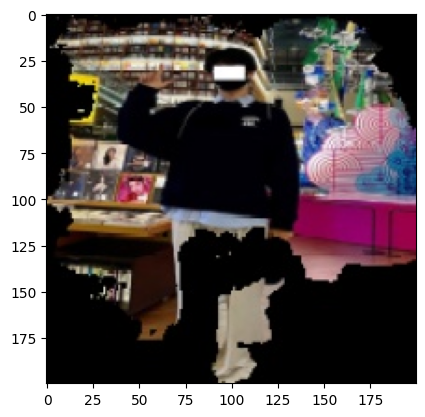

In [ ]:
plt.imshow(img_original[0])
plt.show()

# 학습을 위해 데이터 형식을 numpy로 변경

In [ ]:
img_original = np.array(img_original)
img_original.shape

(12800, 200, 200, 3)

# 모델 작성

In [ ]:
# 레이어 이름을 알기 위해
base_model = keras.models.load_model(base_model_path)
base_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 200, 200, 64)      4864      
                                                                 
 dropout_8 (Dropout)         (None, 200, 200, 64)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 100, 100, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 100, 100, 128)     73856     
                                                           

In [ ]:
class FeatureExtractor:
  def __init__(self):
    base_model = keras.models.load_model(base_model_path)
    self.model = keras.Model(inputs=base_model.input, outputs=base_model.get_layer('dense_8').output)

  def summary(self):
    self.model.summary()

  def extract(self, img):
    # 이미지는 이미 200x200 사이즈로 입력
    x = np.expand_dims(img, axis=0) # 입력 차원을 맞추기 위해
    feature = self.model.predict(x, verbose=0)[0]
    return feature / np.linalg.norm(feature)


In [ ]:
feature_model = FeatureExtractor()
feature_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 200, 200, 64)      4864      
                                                                 
 dropout_8 (Dropout)         (None, 200, 200, 64)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 100, 100, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 100, 100, 128)     73856     
                                                             

# 이미지 Feature 정보 추출

In [ ]:
fe_original = []

for i in range(0, len(img_original)):
  feature = feature_model.extract(img_original[i])

  fe_original.append(feature)

  if (i+1)%500 == 0: # 진행도 확인용
    print(str(i+1) + "개 feature 추출 완료")

print("Complete")

500개 feature 추출 완료
1000개 feature 추출 완료
1500개 feature 추출 완료
2000개 feature 추출 완료
2500개 feature 추출 완료
3000개 feature 추출 완료
3500개 feature 추출 완료
4000개 feature 추출 완료
4500개 feature 추출 완료
5000개 feature 추출 완료
5500개 feature 추출 완료
6000개 feature 추출 완료
6500개 feature 추출 완료
7000개 feature 추출 완료
7500개 feature 추출 완료
8000개 feature 추출 완료
8500개 feature 추출 완료
9000개 feature 추출 완료
9500개 feature 추출 완료
10000개 feature 추출 완료
10500개 feature 추출 완료
11000개 feature 추출 완료
11500개 feature 추출 완료
12000개 feature 추출 완료
12500개 feature 추출 완료
Complete


# 랜덤 Test 데이터 불러오기

In [ ]:
rand_num = random.randint(1, 3200)
img_path = test_dir_name + "Image/" + str(rand_num) + ".jpg"
label_path = test_dir_name + "Json/" + str(rand_num) + ".json"

# 이미지 파일 로드
img_bgr = cv2.imread(img_path)
if img_bgr is None:
  print(str(rand_num) + ".jpg File Load Failed!!")
img_test = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# json 파일 로드
with open(label_path, "r") as loadfile:
  label_test = json.load(loadfile)
  if label_test is None:
    print(str(rand_num) + ".json File Load Failed!!")

print("Complete")

Complete


In [ ]:
img_test = np.array(img_test)
img_test.shape

(200, 200, 3)

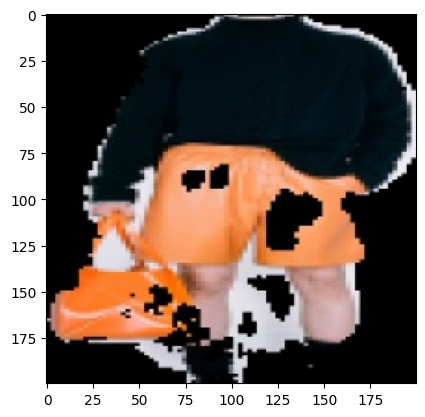

In [ ]:
plt.imshow(img_test)
plt.show()

In [ ]:
label_test

{'Img_Height': 200, 'Img_Width': 200, 'Labeling': 'Metrosexual'}

In [ ]:
label_test['Labeling']

'Metrosexual'

# 유사 이미지 탐색

In [ ]:
# 테스트 이미지에서 feature 추출
query = feature_model.extract(img_test)

# 축적 데이터셋의 feature와 비교
dists = np.linalg.norm(fe_original - query, axis=1)

# 유사도가 높은 상위 20개 이미지의 index 추출
ids = np.argsort(dists)[:20]

print(ids)

[12404  5092  5321  4963  6929  7957 11451 11199  1752  7593 12781 11048
  9806  8955 11276  2034  4897  6695 11987  9838]


# 결과 출력

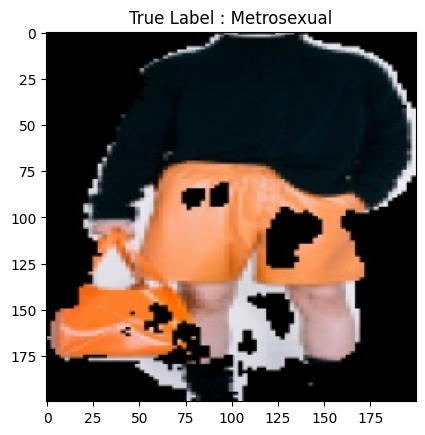

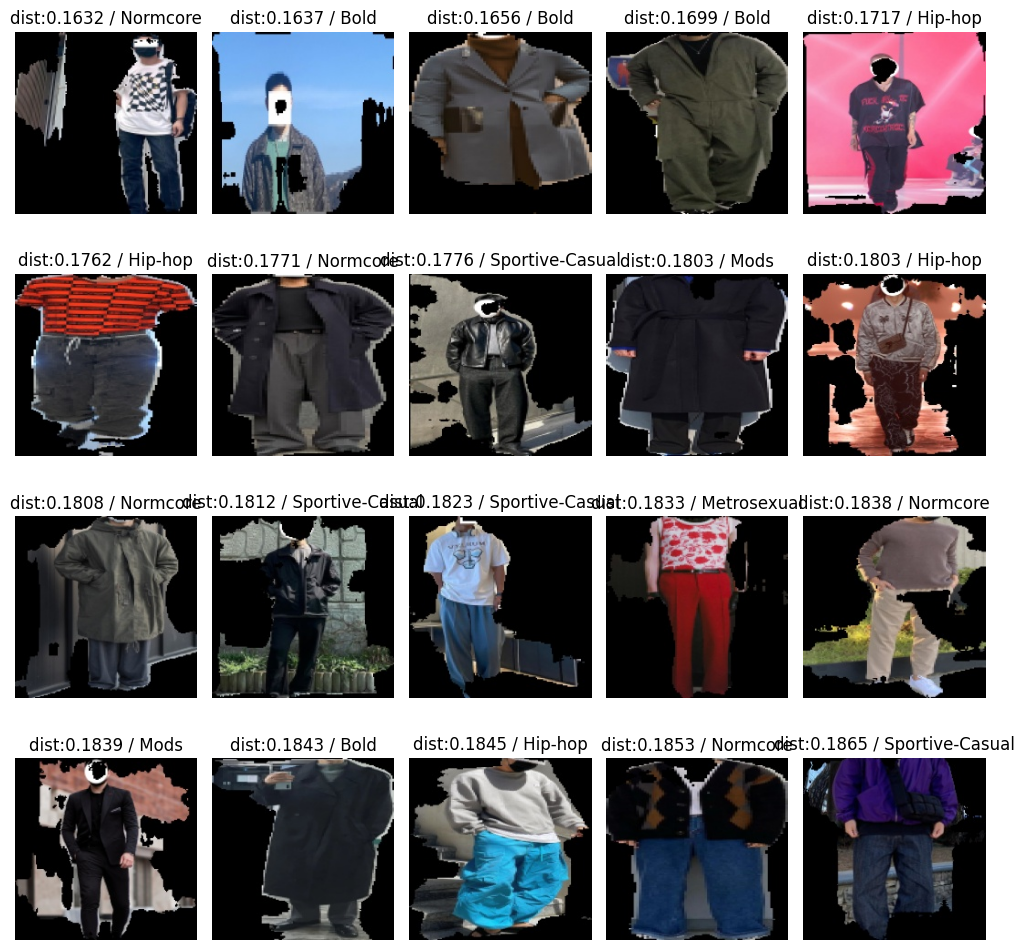

In [ ]:
# 입력 이미지 출력
plt.imshow(img_test)
plt.title("True Label : " + label_test['Labeling'])
plt.show()

# 유사 이미지 출력
axes = []
fig = plt.figure(figsize=(10,10))
for i in range(20):
    dist = dists[ids[i]]
    label = label_original[ids[i]]

    axes.append(fig.add_subplot(4, 5, i+1))
    subplot_title = 'dist:' + str(round(dist,4)) + " / " + label_original[ids[i]]['Labeling']
    axes[-1].set_title(subplot_title)
    plt.axis('off')
    plt.imshow(img_original[ids[i]])

fig.tight_layout()
plt.show()